**Exploratory Data Analysis (EDA)**:

In [2]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e7/sample_submission.csv
/kaggle/input/playground-series-s4e7/train.csv
/kaggle/input/playground-series-s4e7/test.csv


In [4]:
df_train = pd.read_csv("/kaggle/input/playground-series-s4e7/train.csv", low_memory=False)
df_test = pd.read_csv("/kaggle/input/playground-series-s4e7/test.csv", low_memory=False)

In [4]:
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11504798 entries, 0 to 11504797
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   Gender                object 
 2   Age                   int64  
 3   Driving_License       int64  
 4   Region_Code           float64
 5   Previously_Insured    int64  
 6   Vehicle_Age           object 
 7   Vehicle_Damage        object 
 8   Annual_Premium        float64
 9   Policy_Sales_Channel  float64
 10  Vintage               int64  
 11  Response              int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 1.0+ GB


In [11]:
print(df_train.shape)
print(df_test.shape)

(11504798, 12)
(7669866, 11)


In [5]:
df_train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0


In [6]:
df_test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,11504798,Female,20,1,47.0,0,< 1 Year,No,2630.0,160.0,228
1,11504799,Male,47,1,28.0,0,1-2 Year,Yes,37483.0,124.0,123
2,11504800,Male,47,1,43.0,0,1-2 Year,Yes,2630.0,26.0,271
3,11504801,Female,22,1,47.0,1,< 1 Year,No,24502.0,152.0,115
4,11504802,Male,51,1,19.0,0,1-2 Year,No,34115.0,124.0,148


In [10]:
for var in df_train.columns:
    print(f"{var}: {df_train[var].unique()[:20]} | {df_train[var].nunique()}\n")

id: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] | 11504798

Gender: ['Male' 'Female'] | 2

Age: [21 43 25 35 36 31 23 47 26 66 22 27 24 79 34 20 42 40 50 67] | 66

Driving_License: [1 0] | 2

Region_Code: [35. 28. 14.  1. 15. 47. 45.  8. 11.  3. 10. 12. 37. 50. 30. 46. 29. 16.
 26. 25.] | 54

Previously_Insured: [0 1] | 2

Vehicle_Age: ['1-2 Year' '> 2 Years' '< 1 Year'] | 3

Vehicle_Damage: ['Yes' 'No'] | 2

Annual_Premium: [65101. 58911. 38043.  2630. 31951. 28150. 27128. 40659. 31639. 27996.
 38104. 43746. 23692. 66887. 30226. 36389. 25769. 40797. 29698. 27677.] | 51728

Policy_Sales_Channel: [124.  26. 152. 156. 160.   8.  31. 157.  60. 122.  15.  30. 147.   1.
  63. 136. 154.  18. 135. 151.] | 152

Vintage: [187 288 254  76 294 197 190 262  36 125 215  30 203 259 245 150 240 242
 117 151] | 290

Response: [0 1] | 2



In [7]:
df_train.isnull().sum())

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64


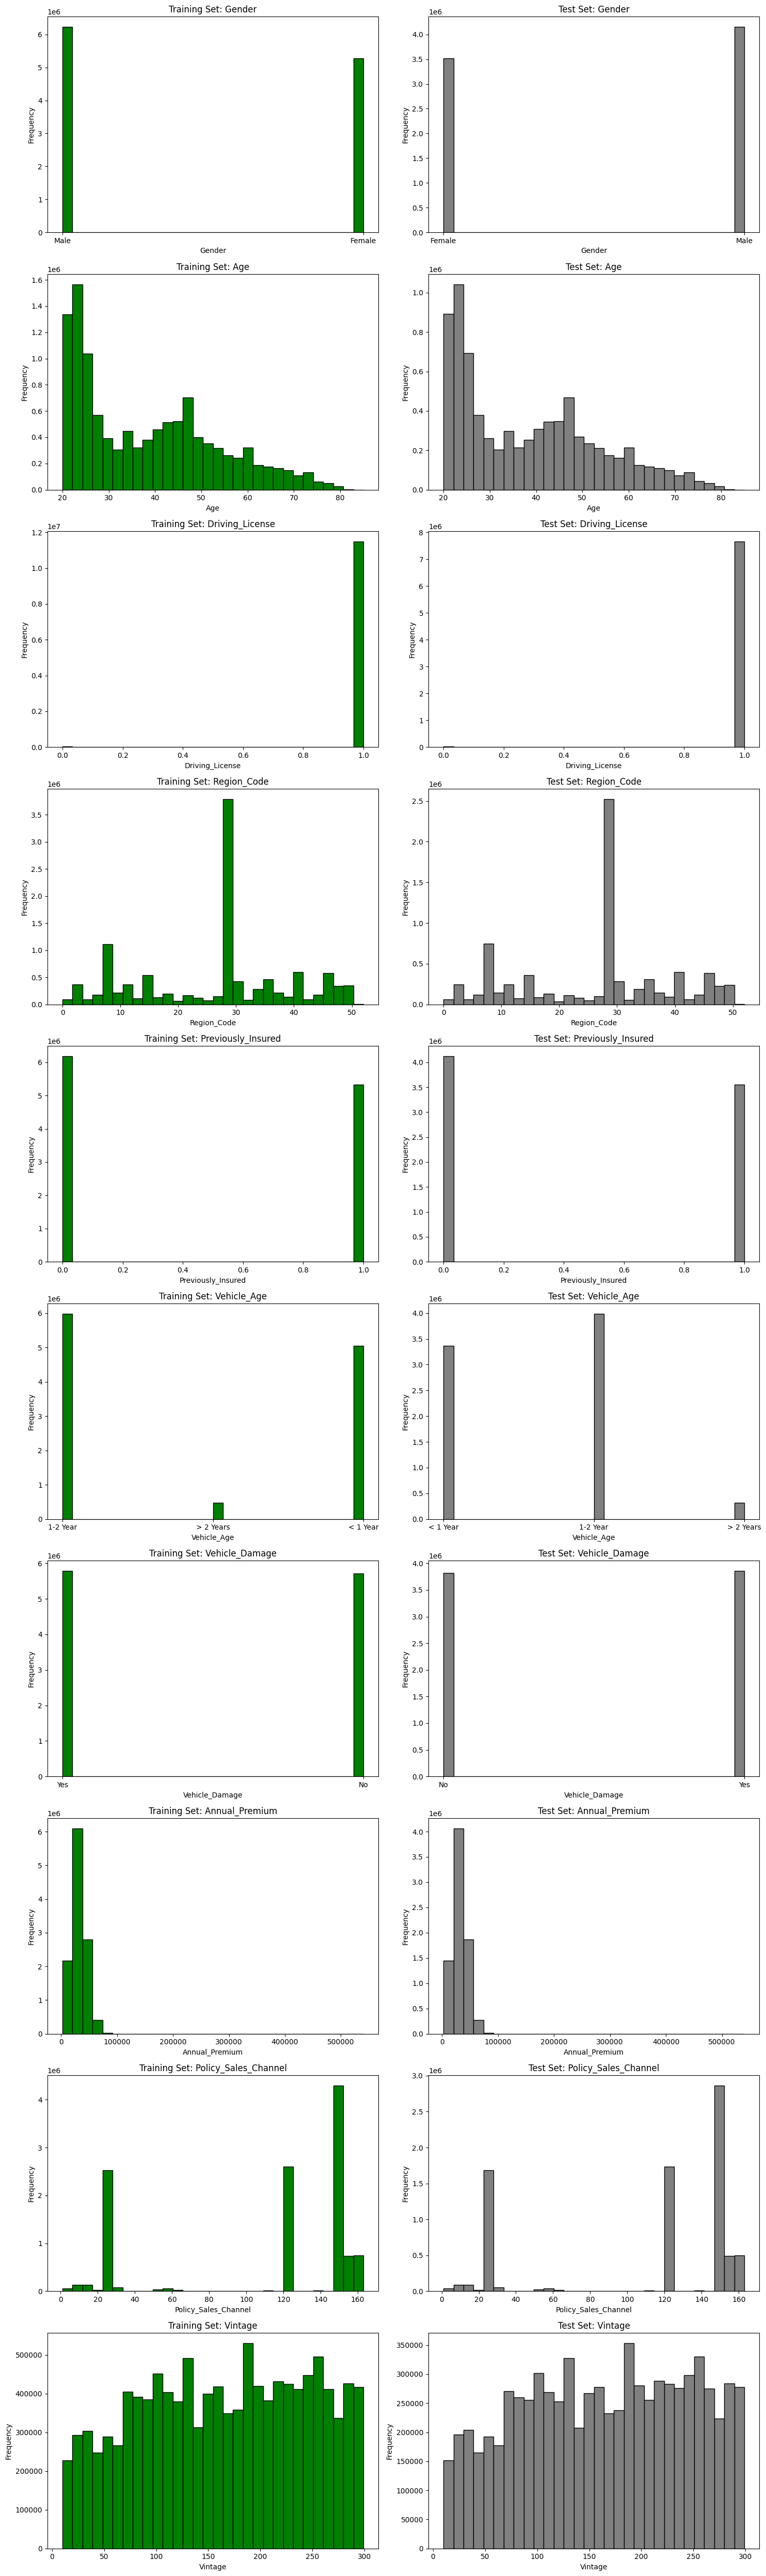

In [12]:
# Exclude the Response column from comparison
columns_to_compare = [col for col in df_train.columns if col != 'Response' and col != 'id']

# Create a grid of subplots
n_cols = 2
n_rows = len(columns_to_compare)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

for i, column in enumerate(columns_to_compare):
    # Plot df_train column
    ax_train = axes[i, 0]
    ax_train.hist(df_train[column].dropna(), bins=30, edgecolor='k', color='green')
    ax_train.set_title(f'Training Set: {column}')
    ax_train.set_xlabel(column)
    ax_train.set_ylabel('Frequency')
    
    # Plot df_test column
    ax_test = axes[i, 1]
    ax_test.hist(df_test[column].dropna(), bins=30, edgecolor='k', color='grey')
    ax_test.set_title(f'Test Set: {column}')
    ax_test.set_xlabel(column)
    ax_test.set_ylabel('Frequency')

# Adjust layout for better display
plt.tight_layout()
plt.show()


In [13]:
train_counts = df_train['Annual_Premium'].value_counts().sort_index()

In [14]:
train_counts

Annual_Premium
2630.0      2112561
2642.0            1
2698.0            1
2730.0           10
2738.0            1
             ...   
538374.0          1
539233.0          1
539256.0          1
539471.0          2
540165.0         78
Name: count, Length: 51728, dtype: int64

In [15]:
train_counts = df_train['Annual_Premium'].value_counts().sort_values(ascending=False)

In [16]:
train_counts

Annual_Premium
2630.0      2112561
38287.0        6363
39008.0        5285
38452.0        4721
28861.0        4671
             ...   
67612.0           1
158860.0          1
91379.0           1
268921.0          1
64538.0           1
Name: count, Length: 51728, dtype: int64

# **Conversion to Numerical Data Types**

In [5]:
# Create a new DataFrame with converted numerical types
df_numerical = pd.DataFrame({
    'Gender': df_train['Gender'].astype('category').cat.codes,
    'Age': df_train['Age'],
    'Driving_License': df_train['Driving_License'],
    'Region_Code': df_train['Region_Code'].astype(int),
    'Previously_Insured': df_train['Previously_Insured'],
    'Vehicle_Age': df_train['Vehicle_Age'].astype('category').cat.codes,
    'Vehicle_Damage': df_train['Vehicle_Damage'].astype('category').cat.codes,
    'Annual_Premium': df_train['Annual_Premium'].astype(float),
    'Policy_Sales_Channel': df_train['Policy_Sales_Channel'].astype(int),
    'Vintage': df_train['Vintage'],
    'Response': df_train['Response']
})

# Verify the data types in the new DataFrame
df_numerical.dtypes

Gender                     int8
Age                       int64
Driving_License           int64
Region_Code               int64
Previously_Insured        int64
Vehicle_Age                int8
Vehicle_Damage             int8
Annual_Premium          float64
Policy_Sales_Channel      int64
Vintage                   int64
Response                  int64
dtype: object

In [7]:
df_numerical.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,21,1,35,0,0,1,65101.0,124,187,0
1,1,43,1,28,0,2,1,58911.0,26,288,1
2,0,25,1,14,1,1,0,38043.0,152,254,0
3,0,35,1,1,0,0,1,2630.0,156,76,0
4,0,36,1,15,1,0,0,31951.0,152,294,0


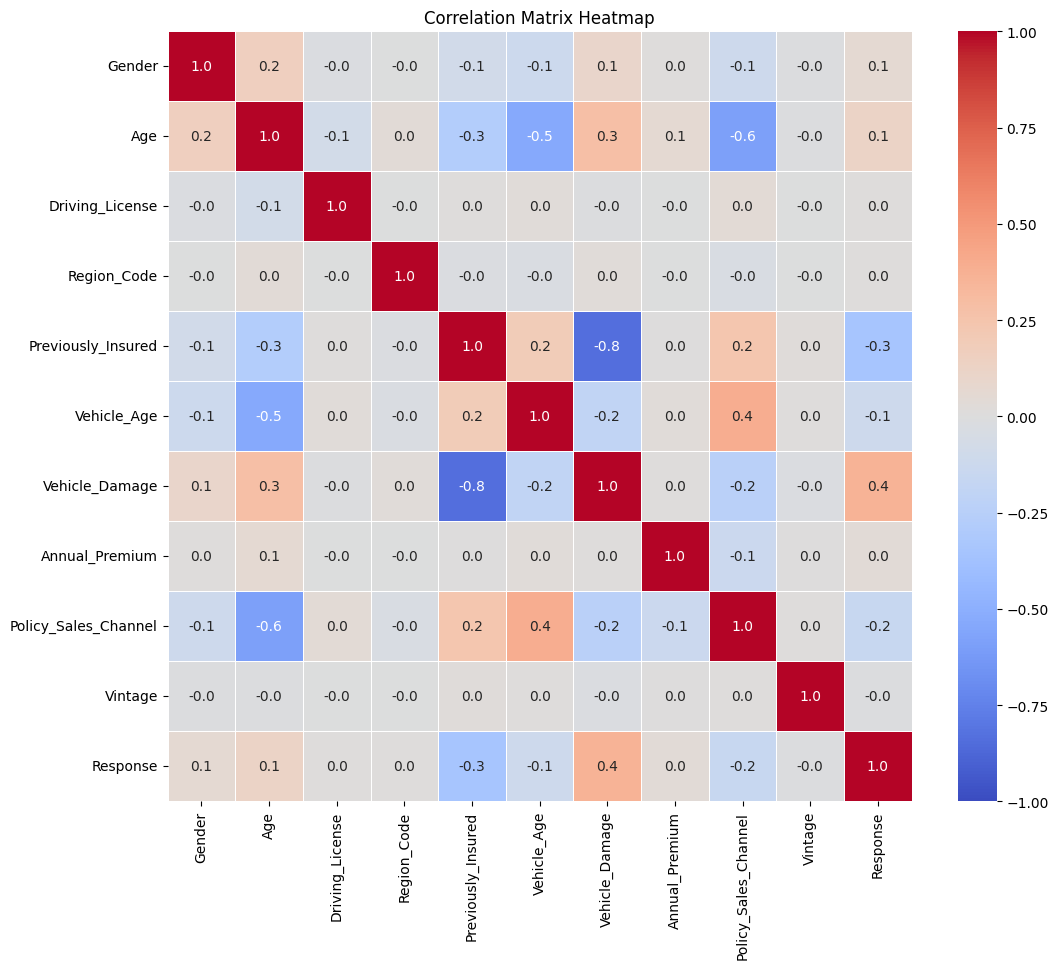

In [8]:
# Compute the correlation matrix
corr_matrix = df_numerical.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.1f', cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()